# Pattern Recognition HW2

# K-SVM

In [34]:
import random
import time
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC

from dataset import MGDDataset

In [35]:
time.time()
RANDOM_SEED = 777

random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

Path("./k_svm").mkdir(parents=True, exist_ok=True)

## Dataset

In [4]:
dataset = MGDDataset.generate_entire_dataset(cls1_dataset_n=1000, cls2_dataset_n=1000, is_shuffle=True)

In [9]:
train_test_dataset_dict = dataset.train_test_split(test_ratio=0.25)
train_dataset = train_test_dataset_dict["train_dataset"]
val_dataset = train_test_dataset_dict["val_dataset"]

print(f"Size of train dataset : {len(train_dataset)}, Size of val dataset : {len(val_dataset)}")

Size of train dataset : 1500, Size of val dataset : 500


## Train & Validation

In [31]:
kernel_name_list = ["linear", "poly", "rbf", "sigmoid"]
clf_result_dict = {kernel_name: dict() for kernel_name in kernel_name_list}

for kernel_name in kernel_name_list:
    print(f" === [ {kernel_name} ] === ")
    clf = SVC(kernel=kernel_name)
    clf.fit(X=train_dataset.X, y=train_dataset.y)

    y_pred_list = clf.predict(X=val_dataset.X)

    metrics_dict = classification_report(
            y_true=val_dataset.y,
            y_pred=y_pred_list,
            target_names=["class_1", "class_2"],
            output_dict=True
        )
    print(classification_report(
            y_true=val_dataset.y,
            y_pred=y_pred_list,
            target_names=["class_1", "class_2"],
            output_dict=False
        ))

    clf_result_dict[kernel_name]["classifier"] = clf
    clf_result_dict[kernel_name]["y_pred_list"] = y_pred_list
    clf_result_dict[kernel_name]["metrics"] = metrics_dict

 === [ linear ] === 
              precision    recall  f1-score   support

     class_1       0.88      0.46      0.60       246
     class_2       0.64      0.94      0.76       254

    accuracy                           0.70       500
   macro avg       0.76      0.70      0.68       500
weighted avg       0.76      0.70      0.68       500

 === [ poly ] === 
              precision    recall  f1-score   support

     class_1       1.00      0.15      0.26       246
     class_2       0.55      1.00      0.71       254

    accuracy                           0.58       500
   macro avg       0.77      0.57      0.48       500
weighted avg       0.77      0.58      0.49       500

 === [ rbf ] === 
              precision    recall  f1-score   support

     class_1       0.96      0.97      0.96       246
     class_2       0.97      0.96      0.96       254

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg    

## Plotting

In [41]:
def plot_decision_boundary(clf, dataset, ax):
    min_f1, max_f1 = np.min(dataset.X[:, 0]), np.max(dataset.X[:, 0])
    min_f2, max_f2 = np.min(dataset.X[:, 1]), np.max(dataset.X[:, 1])

    f1_space = np.linspace(min_f1, max_f1, 100)
    f2_space = np.linspace(min_f2, max_f2, 100)

    f1f1, f2f2 = np.meshgrid(f1_space, f2_space)

    feature_space = np.vstack([f1f1.ravel(), f2f2.ravel()]).T

    Z1 = clf.decision_function(feature_space).reshape(f1f1.shape) # 100,100
    plt.contour(f1f1, f2f2, Z1, colors='k', levels=1, alpha=0.5, linestypes=['--','-','--'])
    ax.pcolormesh(f1f1, f2f2, -Z1, cmap=plt.cm.RdBu)

 === [ linear ] ===
 === [ poly ] ===
 === [ rbf ] ===
 === [ sigmoid ] ===


d:\programming\python\venv\assignment\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'linestypes'
  del sys.path[0]
d:\programming\python\venv\assignment\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  
d:\programming\python\venv\assignment\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'linestypes'
  del sys.path[0]
d:\programming\python\venv\assignment\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and 

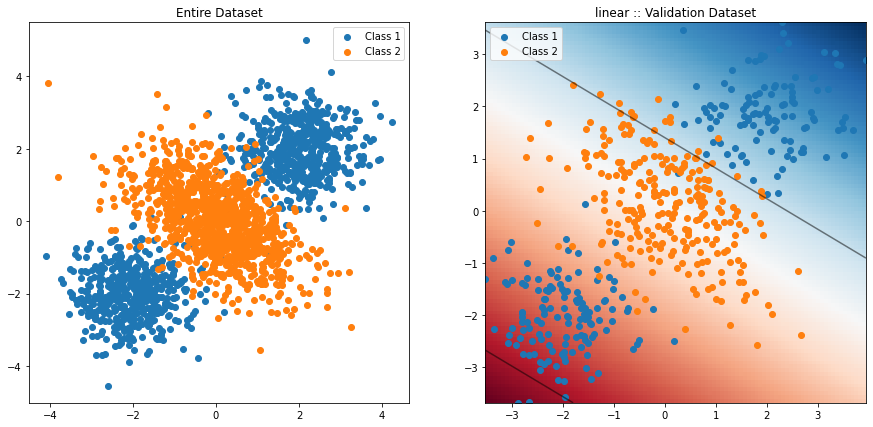

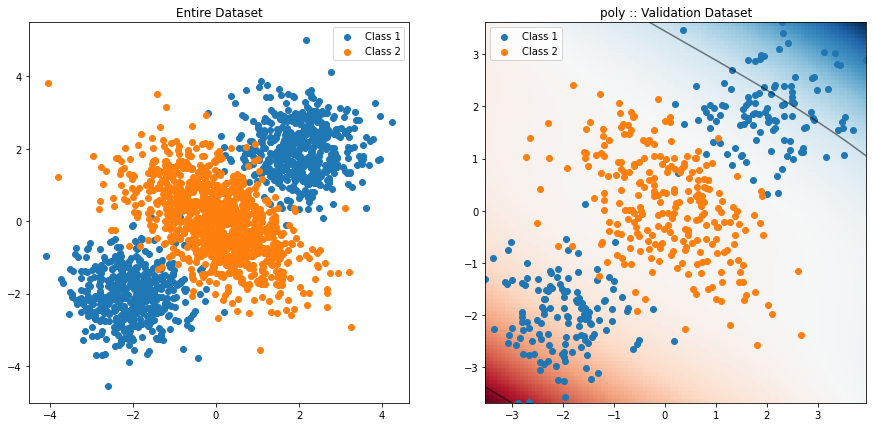

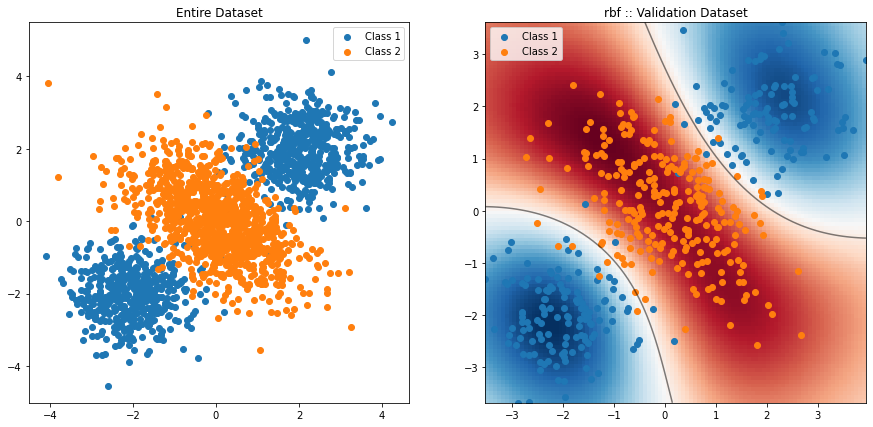

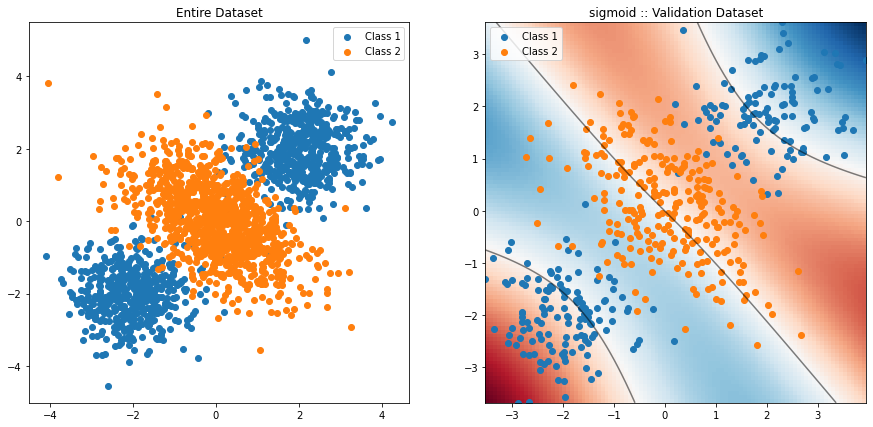

In [43]:
for kernel_name in clf_result_dict.keys():

    print(f" === [ {kernel_name} ] ===")
    current_clf_result_dict = clf_result_dict[kernel_name]

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

    ax[0].scatter(dataset.filter_by_class(cls=0).T[0], dataset.filter_by_class(cls=0).T[1], label="Class 1")
    ax[0].scatter(dataset.filter_by_class(cls=1).T[0], dataset.filter_by_class(cls=1).T[1], label="Class 2")
    ax[0].set_title("Entire Dataset")
    ax[0].legend()

    plot_decision_boundary(clf=current_clf_result_dict["classifier"], dataset=val_dataset, ax=ax[1])
    ax[1].scatter(val_dataset.filter_by_class(cls=0).T[0], val_dataset.filter_by_class(cls=0).T[1], label="Class 1")
    ax[1].scatter(val_dataset.filter_by_class(cls=1).T[0], val_dataset.filter_by_class(cls=1).T[1], label="Class 2")
    ax[1].set_title(f"{kernel_name} :: Validation Dataset")
    ax[1].legend()

    plt.savefig(f"./k_svm/{kernel_name}_plot.png")
    plt.show()